In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

Load in the data we want (with only the first 13 columns of the predictions metadata because I wrote them to the file twice (oops))

In [3]:
predictions = xr.open_dataset("../ml_model_data/classification_model/predictions.nc")
predictions_metadata = pd.read_csv("../ml_model_data/classification_model/metadata_predict.csv", index_col=0, header=None).iloc[:13].T.to_xarray()

Pull out the variable fields we want

In [4]:
true_no_hail = predictions.true_no_hail.values
true_hail = predictions.true_hail.values
true_sev_hail = predictions.true_sev_hail.values
true_sig_sev_hail = predictions.true_sig_sev_hail.values
mesh = predictions.drop(('predicted_no_hail', 'predicted_hail', 'predicted_sev_hail', 'predicted_sig_sev_hail'))
predicted_no_hail = predictions.predicted_no_hail.values
predicted_hail = predictions.predicted_hail.values
predicted_sev_hail = predictions.predicted_sev_hail.values
predicted_sig_sev_hail = predictions.predicted_sig_sev_hail.values
output = predictions.drop(('true_no_hail', 'true_hail', 'true_sev_hail', 'true_sig_sev_hail'))

Pull out all the indicies that had significant severe hail, so we can see how our model is working on the high-end cases

In [5]:
index = []
lats = []
lons = []
times = []
for i in range(true_hail.shape[0]):
    if(true_sig_sev_hail[i,:,:].max() == 1):
        index.append(i)
        lats.append(float(predictions_metadata.Lat.values[i][1:-1]))
        lons.append(float(predictions_metadata.Lon.values[i][1:-1]))
        times.append(np.datetime64(predictions_metadata.Time.values[i][2:-15]))
print(lats)
print(lons)
print(times)

[45.54230072, 42.05828623, 43.42935564, 43.37311485, 38.7352372, 39.97500622, 44.43022418, 37.79042782]
[254.45713523, 253.95907994, 253.85788218, 255.5722555, 263.56618496, 255.20118896, 265.91329125, 263.62061335]
[numpy.datetime64('2019-07-09T02:00'), numpy.datetime64('2019-07-05T02:00'), numpy.datetime64('2020-07-20T00:00'), numpy.datetime64('2019-07-04T05:00'), numpy.datetime64('2019-08-16T04:00'), numpy.datetime64('2019-08-20T22:00'), numpy.datetime64('2019-07-15T21:00'), numpy.datetime64('2019-08-16T04:00')]


Create a function that will plot the predicted values against the truth values

In [6]:
def plot_ml_output(mesh, output, to_save, idx = 0):
    pkeys = ['predicted_no_hail', 'predicted_hail', 'predicted_sev_hail', 'predicted_sig_sev_hail']
    plabels = ["Predicted No Hail", "Predicted Hail", "Predicted Severe Hail", "Predicted Significant Severe Hail"]

    tkeys = ['true_no_hail', 'true_hail', 'true_sev_hail', 'true_sig_sev_hail']
    tlabels = ["No Hail", "Hail", "Severe Hail", "Significant Severe Hail"]
    
    fig, axes = plt.subplots(2,4,figsize=(12,5))
    axes = axes.ravel()

    for i,ax in enumerate(axes):
        if(i < 4):
            pm = ax.pcolormesh(mesh[tkeys[i]][idx,:,:],cmap = 'cividis',vmin = 0,vmax = 1)
            ax.set_title(tlabels[i])
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            pm = ax.pcolormesh(output[pkeys[i - 4]][idx,:,:],cmap = 'cividis')#,vmin = 0,vmax = 1)
            ax.set_title(plabels[i - 4])
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()
    plt.savefig(to_save)

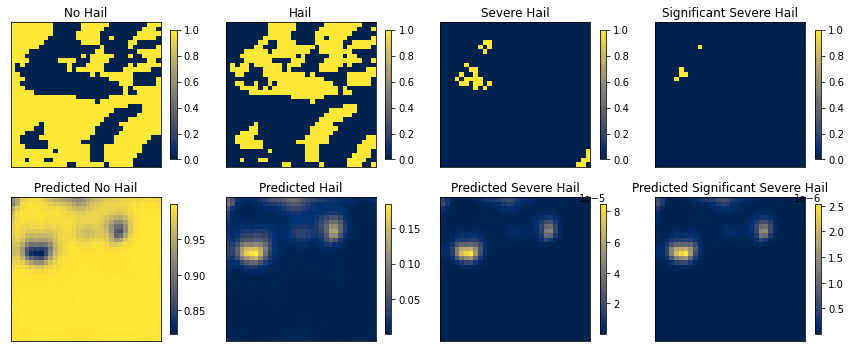

In [7]:
plot_ml_output(mesh, output,'ml_output_3.png', index[0])